# Центральная предельная теорема своими руками

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

## Определим необходимые библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import interpolate
from numpy import sqrt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Определим границы распределения

In [2]:
a, b = -100, 100
count = 1000
x_offset = 6000
y_offset = 30000

## Создадим основу для "бешеного" распределения

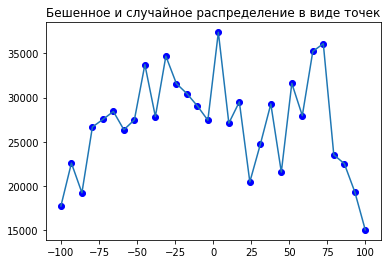

In [3]:
x = np.linspace(a, b, 30)
y = -x**2 + np.random.randn(len(x)) * x_offset + y_offset
plt.plot(x, y, 'bo', x, y)
plt.title('Бешенное и случайное распределение в виде точек')
plt.show()

## Создадим функцию распределения для "бешеного" распределения

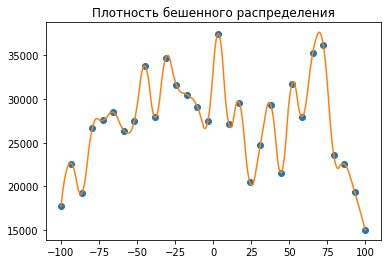

In [4]:
func = interpolate.interp1d(x, y, kind='quadratic')
x_func = np.linspace(a, b, 1000)
y_func = func(x_func)
plt.plot(x, y, 'o', x_func, y_func, '-')
plt.title('Плотность бешенного распределения')
plt.show()

## Определим свойства нашего распределения

In [5]:
EX_global = np.mean(y_func)
DX_global = np.var(y_func)
print('Мат ожидание бешеного распределения с помощью np.mean = ', np.mean(y_func))
print('Дисперсия бешеного распределения с помощью np.var = ', np.var(y_func))

EX_global = y_func.sum() / len(y_func)
DX_global = np.sum((y_func - EX_global)**2) / len(y_func)
print('Мат ожидание бешеного распределения своими руками = ', EX_global)
print('Дисперсия бешеного распределения своими руками = ', DX_global)

Мат ожидание бешеного распределения с помощью np.mean =  27481.927872829645
Дисперсия бешеного распределения с помощью np.var =  24265890.858678237
Мат ожидание бешеного распределения своими руками =  27481.927872829645
Дисперсия бешеного распределения своими руками =  24265890.858678237


## Создаём выборки

Используем определения, которые гласят следующее:
$$ EX = \frac{1}{n} * \sum\limits_{i=1}^n x_i $$ - это мат ожидание
$$ DX = \frac{1}{n} * \sum\limits_{i=1}^n (x_i-EX)^2 $$ - это дисперсия

## Создадим функцию, которая возвращает массив выборочных средних на основе 1000 выборок.

In [22]:
def getNormDistMeanMulti(size):
    EX = list()
    for i in np.arange(0, count):
        EX.append(getNormDistMean(size))
    return EX

def getNormDistMean(size):
    x = np.random.randint(a, b, size)
    y = func(x)
    EX = np.mean(y)
    return EX

Функция, которая рисует график

In [45]:
def plotNorm(size):
    Props = getNormDistMeanMulti(size)
    EX = np.mean(Props)
    DX = np.var(y_func)
    normdist = norm(EX, sqrt(DX / size))
    x = np.linspace(np.amin(Props), np.amax(Props), count)
    
    plt.hist(Props, label='Гистограмма распределения', normed = True) 
    plt.plot(x, normdist.pdf(x), label='Плотность распределения', color = 'red') 
    plt.title('1000 выборок объёмом ' + str(size))
    plt.legend()
    plt.show()

## Выводим гистограммы выборок

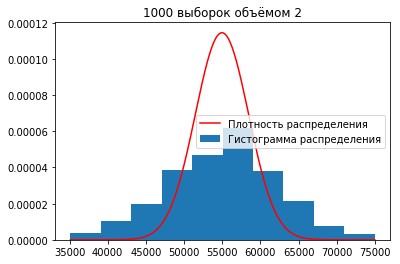

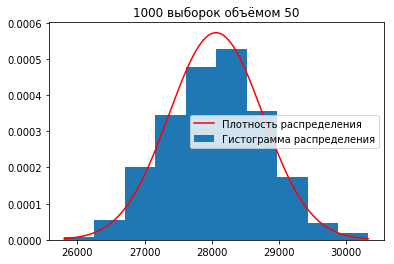

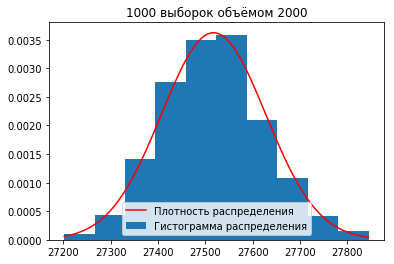

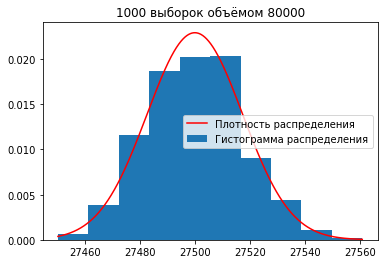

In [52]:
count_list = [2, 50, 2000, 80000]
for i in count_list:
    plotNorm(i)

## Выводы

С увеличением объёма выборки хвосты гистограммы выборочных средних уменьшаются, так как у этих гистограмм уменьшается дисперсия (разброс). При объёме выборки в 2 элемента мат ожидание сильно отъехало в сторону от истинного значения. При объёме выборки в 50 элементов ситуация намного лучше. Чем больше объём - тем меньше разброс.

Гистограммы выборочных средних совпадают с нормальным распределением, которое получено на основе данных о мат ожидании, дисперсии и объёма выборки (EX, DX/size). 

ЦПТ была подтверждена.